In [27]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
import psycopg2
import config
from config import db_pw

In [28]:
#establishing the connection
conn = psycopg2.connect(
   database="Predictive_Senescence_DB", user='postgres', password= db_pw, host='predictive-senescence-db.cbunnafql9ym.us-east-2.rds.amazonaws.com', port= '5432'
)

#Setting auto commit false
conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Retrieving data
cursor.execute('''SELECT * from birds_data_raw''')

#Fetching 1st row from the table
df = pd.DataFrame(cursor.fetchall(), columns=["Collection_Num", "BirdID", "Sex", "AgeY", "AgeClass", "BirthFPID", "U_PlateID", "RTL", "Technician", "Terr", "FPID", 'mum', 'dad', "MAC", 'PAC','BrF', 'BrM']);
print(df)

#Commit your changes in the database
conn.commit()

#Closing the connection
conn.close()

      Collection_Num  BirdID  Sex       AgeY AgeClass  BirthFPID U_PlateID  \
0                  1    5511    0   0.246575        J        103       9_3   
1                  2    5559    1   3.597260        A        103       9_1   
2                  3    5559    1   4.715068        A        103      9_28   
3                  4    5559    1   0.657534       SA        103       9_2   
4                  5    5527    1   0.328767      OFL        103       9_3   
...              ...     ...  ...        ...      ...        ...       ...   
2657            2658     221    1   6.958904        A          8       2_1   
2658            2659     216    1   8.947945        A          8       8_8   
2659            2660     176    1   6.772603        A          8      7_32   
2660            2661     221    1   9.090411        A          8      1_12   
2661            2662     176    1  13.873973        A          8       4_3   

       RTL  Technician   Terr  FPID   mum   dad       MAC      

In [29]:
# sub set data
sub_df= df[['AgeY', 'RTL','AgeClass']]
sub_df.head()

,AgeY,RTL,AgeClass
0,0.246575,1.06,J
1,3.597260,0.52,A
2,4.715068,1.07,A
3,0.657534,0.99,SA
4,0.328767,1.02,OFL


In [30]:
# evalaute the mean of Age in Years and Telomere length by age class
m_sub_df= sub_df.groupby(df.AgeClass).mean()
m_sub_df
#m_sub_df.to_csv("MeanAgeYRTLClass.csv")

,AgeY,RTL
AgeClass,,
A,4.361859,0.876864
CH,0.028429,1.080370
FL,0.156411,1.053764
J,0.300449,0.963628
OFL,0.349101,0.908246
SA,0.839918,0.900535


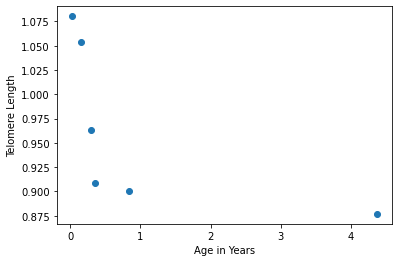

In [31]:
# plot mean Age by telomere lenght
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(m_sub_df.AgeY, m_sub_df.RTL)
plt.xlabel('Age in Years')
plt.ylabel('Telomere Length')
plt.show()
#fig.savefig('MeanAgeYTelo.png')

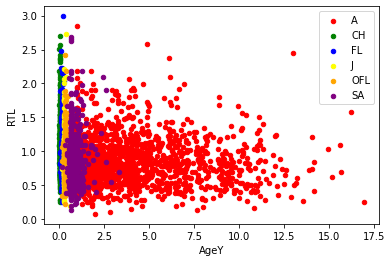

In [32]:
# plot Age in years and telemoere length by age Class
# https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
AgeY= sub_df['AgeY']
RTL=sub_df['RTL']
AgeClass=sub_df['AgeClass']
dfp1= pd.DataFrame(dict(AgeY=AgeY, RTL=RTL, AgeClass=AgeClass))
#fig, ax = plt.subplots()
#colors = {'A':'red', 'CH':'green', 'FL':'blue', 'J':'yellow', 'OFL':'orange', 'SA':'purple'}
#ax.scatter(df['AgeY'], df['RTL'], c=df['AgeClass'].map(colors))
#plt.show()


fig, ax = plt.subplots()

colors = {'A':'red', 'CH':'green', 'FL':'blue', 'J':'yellow', 'OFL':'orange', 'SA':'purple'}

grouped = dfp1.groupby('AgeClass')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='AgeY', y='RTL', label=key, color=colors[key])

plt.show()
#fig.savefig('ScattRTLAgeYAllClass.png')

<AxesSubplot:title={'center':'RTL'}, xlabel='[AgeClass]'>

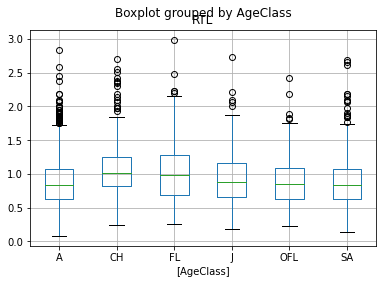

In [33]:
# box plot telemere length grouped by Age Class
from matplotlib import pyplot as plt
# Plot boxplots of RTL by AgeClass
sub_df.boxplot(['RTL'], by=['AgeClass'])
#plt.savefig('RTLAllClass.png')

In [34]:
# combine (green and blue CH, FL, ) ( yellow and orange J, and OFL)  and keep purple AS and red A seperate
# add Age_CAt to the sub_df dataframe
# https://www.youtube.com/watch?v=to5xBubdcqo

sub_df['AgeClass']= sub_df['AgeClass'].replace({"FL":"CH"})
sub_df['AgeClass']= sub_df['AgeClass'].replace({"OFL":"J"})
#sub_df['AgeClass']= sub_df['AgeClass'].replace({"SA":"A"})
sub_df['AgeClass'].value_counts()
sub_df.head()

,AgeY,RTL,AgeClass
0,0.246575,1.06,J
1,3.597260,0.52,A
2,4.715068,1.07,A
3,0.657534,0.99,SA
4,0.328767,1.02,J


<AxesSubplot:title={'center':'RTL'}, xlabel='[AgeClass]'>

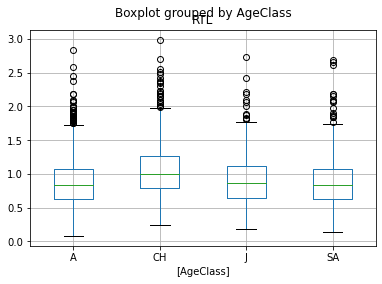

In [35]:
# Evaluate four class
from matplotlib import pyplot as plt
# Plot boxplots of RTL by AgeClass
sub_df.boxplot(['RTL'], by=['AgeClass'])
#plt.savefig('FourClass.png')

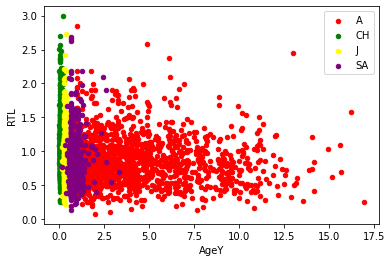

In [36]:
# plot Age in years and telomere lenght by condenced Age class

# https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
AgeY= sub_df['AgeY']
RTL=sub_df['RTL']
AgeClass=sub_df['AgeClass']
dfp2= pd.DataFrame(dict(AgeY=AgeY, RTL=RTL, AgeClass=AgeClass))
#fig, ax = plt.subplots()
#colors = {'A':'red', 'CH':'green', 'FL':'blue', 'J':'yellow', 'OFL':'orange', 'SA':'purple'}
#ax.scatter(df['AgeY'], df['RTL'], c=df['AgeClass'].map(colors))
#plt.show()


fig, ax = plt.subplots()

colors = {'A':'red', 'CH':'green', 'FL':'blue', 'J':'yellow', 'OFL':'orange', 'SA':'purple'}

grouped = dfp2.groupby('AgeClass')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='AgeY', y='RTL', label=key, color=colors[key])

plt.show()
#fig.savefig('ScattRTLAgeYFourClass.png')

In [37]:
# evaluate the the age classes
sub_df['AgeClass'].value_counts()

A     1387
CH     502
SA     449
J      324
Name: AgeClass, dtype: int64

In [38]:
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import hvplot.pandas
import plotly.figure_factory as ff
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# encode string values into numeric values
class_dict = {'CH': 0, 'J': 1, 'SA':2, 'A': 3}
df2 = sub_df.replace({'AgeClass': class_dict})

In [40]:
# Class names have been replaced with numbers
df2['AgeClass'].unique()

array([1, 3, 2, 0], dtype=int64)

In [41]:
df2.head()

,AgeY,RTL,AgeClass
0,0.246575,1.06,1
1,3.597260,0.52,3
2,4.715068,1.07,3
3,0.657534,0.99,2
4,0.328767,1.02,1


In [42]:
# normalize 
normalized = normalize(df2)

In [43]:
# merge
mergings = linkage(normalized, method='ward')

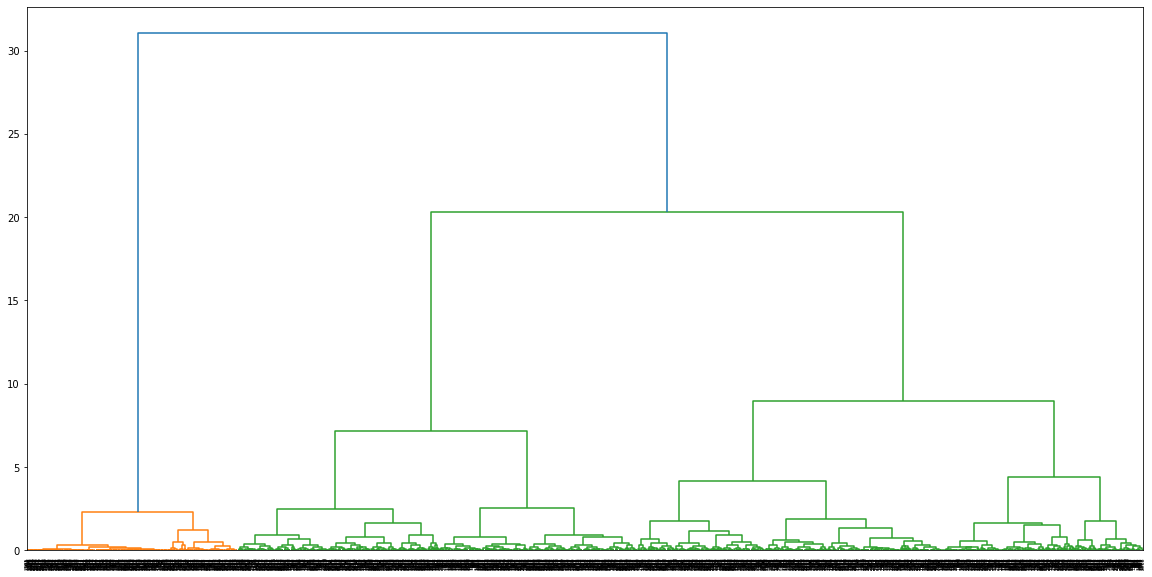

In [44]:
# plot the dendogram clusters
plt.figure(figsize=(20,10))


dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

#fig.savefig('Dendo.png')

In [45]:
df3 = pd.DataFrame(normalized)
df3.columns = df2.columns

In [46]:
cluster = AgglomerativeClustering(n_clusters=3,
                                 affinity='euclidean',
                                 linkage='ward')
labels = cluster.fit_predict(df3)

In [47]:
labels

array([0, 2, 2, ..., 2, 2, 2], dtype=int64)

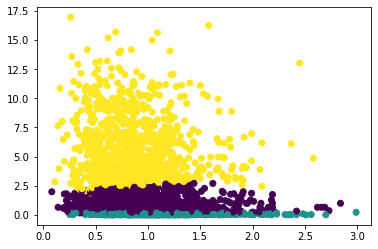

In [48]:
# Create a scatter plot with two of the features
fig = plt.figure()
plt.scatter(df2['RTL'], df2['AgeY'], c=labels)
plt.show()
#fig.savefig('ClustScattFourClass.png')

#### next try only two clusters- young and Adult, could even check against Logistic regression 

In [49]:
cluster = AgglomerativeClustering(n_clusters=2,
                                 affinity='euclidean',
                                 linkage='ward')
labels = cluster.fit_predict(df3)

In [50]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

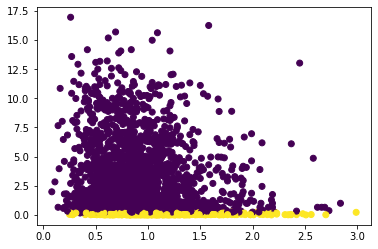

In [51]:
# Create a scatter plot with two of the features
fig = plt.figure()
plt.scatter(df2['RTL'], df2['AgeY'], c=labels)
plt.show()
#fig.savefig('ClustScattTwoClass.png')